# 🔍 Exploratory Data Analysis (EDA) — Phase 1: Data Preparation

This notebook represents the **first step** of the forest fire prediction project.  
The goal of this phase is to **prepare and explore the data** before applying any machine learning algorithms.

---

## 🧩 Objectives

In this phase, we focus on:

- **Data Preprocessing:** Handling raw environmental datasets (soil and climate data) to ensure quality and consistency.  
- **Data Integration:** Combining multiple datasets from different sources into a unified structure.  
- **Feature Engineering (Initial):** Preparing relevant features and variables for later modeling steps.

---

## 🌍 Geographic Focus

Since the study targets **North African regions**, we specifically work with:

- **Algeria** and **Tunisia** shapefiles to obtain their polygon representations.  
- **Worldwide datasets** (e.g., soil, temperature, humidity, rainfall, wind speed) clipped to these regions of interest.

---

## ⚙️ Summary of Work in This Notebook
### Tp 1 
1. **Download** the necessary datasets.  
2. **Load** and inspect them using appropriate Python libraries (`pandas`, `geopandas`, `rasterio`, etc.).  
3. **Explore** and get familiar with GeoPandas for spatial data manipulation.  
4. **Clip** the global raster and vector data to the Algeria–Tunisia region.  
5. **Prepare** the resulting data for further exploration and modeling in upcoming phases.


In [13]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import os
from rasterio.enums import Resampling # ✅ Import Resampling
from shapely.geometry import Point
import numpy as np
from shapely.ops import unary_union


from scripts.explore_raster import show_raster , describe_raster
from scripts.clip_raster_with_shape import clip_raster_with_shape




# Concatenate for plotting
algeria_shp = gpd.read_file("../shapefiles/algeria/gadm41_DZA_0.shp")
tunisia_shp = gpd.read_file("../shapefiles/tunisia/gadm41_TUN_0.shp")
alg_tun_shp = pd.concat([algeria_shp, tunisia_shp], ignore_index=True)

alg_tun_gpd = gpd.GeoDataFrame(geometry=[unary_union(alg_tun_shp.geometry)],
                                crs=alg_tun_shp.crs)






---

## ☁️ Climate Dataset — WorldClim (1950–2024)

In this notebook, we use **historical monthly climate data** from [WorldClim](https://worldclim.org/data/monthlywth.html),  
downscaled from **CRU-TS-4.09** and bias-corrected using **WorldClim 2.1**.  
We focus on the **2020–2024** period.

### 📦 Dataset Overview
- **Variables:**  
  - **Tprec** — average precimum temperature (°C)  
  - **Tmax** — average maximum temperature (°C)  
  - **Precipitation** — total monthly rainfall (mm)
- **Resolution:** 2.5, 5, or 10 arc-precutes (~21–340 km²)
- **Format:** GeoTIFF (.tif), one file per month (120 files per 10-year block)

### 🔬 Notes
- Mean monthly temperature can be estimated as:  
$$
T_{mean} = \frac{T_{min} + T_{max}}{2}
$$
- Each raster value represents the monthly average or total for that variable.
- In this project, we **load and clip** the 2020–2024 layers to **Algeria** and **Tunisia** using `rasterio` and `geopandas`.

---


### 🗺️ Exploring the Climate Dataset

Before analyzing the data, let's first inspect the key metadata of our raster file using the `describe_raster()` function.  
This gives us essential information about the spatial and numerical properties of the dataset:

- **Dimensions** → The width and height (in pixels) of the raster grid. It tells us how many data points the raster contains.  
- **CRS (Coordinate Reference System)** → Defines the spatial reference used to locate data on the Earth's surface (e.g., WGS84).  
- **Resolution** → The real-world size of each pixel, typically in degrees or meters, indicating the dataset’s spatial precision.  
- **Data type** → The numeric type used to store pixel values (e.g., `float32`, `int16`), which affects range and precision.  
- **Bounds** → The geographic extent of the raster (min/max longitude and latitude or x/y coordinates).  
- **Contains NaN values** → Shows whether the raster includes missing or masked data, often representing areas without measurements (e.g., oceans or outside study zones).

Below is an example visualization showing the **first raster from January 2020**, representing temperature (or precipitation) distribution over the study area


🗺️ Exploring clipped raster (NumPy array)
Dimensions: 249 x 224
CRS: EPSG:4326
Resolution: 0.0833, 0.0833
Data type: float32
Bounds: (-8.75, 18.91666666666667, 12.0, 37.583333333333336)
Contains NaN values: True


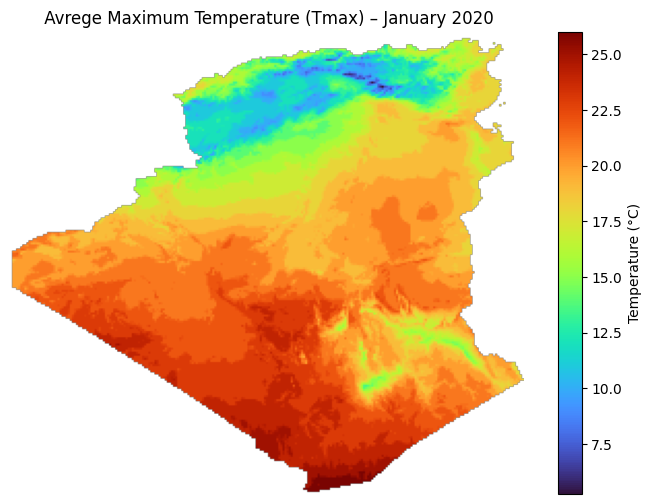

In [20]:
# === 🌡️ Exploring Maximum Temperature (Tmax) Data ===

# 1. Collect all Tmax raster file paths (sorted by date)
tmax_paths = sorted(glob.glob("../climate_dataset/5min/max/*.tif"))

# 2. Clip the first raster (e.g., January 2020) to Algeria–Tunisia boundary
tmax_image, tmax_transform, tmax_meta = clip_raster_with_shape(
    tmax_paths[0],
    alg_tun_gpd
)

# 3. Display raster metadata
describe_raster(tmax_image, tmax_meta, tmax_transform)

# 4. Visualize Tmax map
show_raster(
    tmax_image,
    cmap="turbo",               # good for temperature visualization
    title=" Avrege Maximum Temperature (Tmax) – January 2020",
    scale=None,
    colorbar_label="Temperature (°C)"
)



🗺️ Exploring clipped raster (NumPy array)
Dimensions: 249 x 224
CRS: EPSG:4326
Resolution: 0.0833, 0.0833
Data type: float32
Bounds: (-8.75, 18.91666666666667, 12.0, 37.583333333333336)
Contains NaN values: True


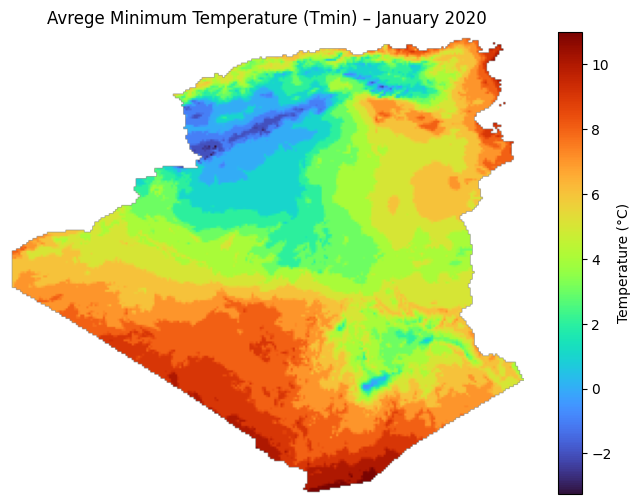

In [26]:
# === ❄️ Exploring Minimum Temperature (Tmin) Data ===

# 1. Collect all Tmin raster file paths (sorted by date)
tmin_paths = sorted(glob.glob("../climate_dataset/5min/min/*.tif"))

# 2. Clip the first raster (e.g., January 2020) to Algeria–Tunisia boundary
tmin_image, tmin_transform, tmin_meta = clip_raster_with_shape(
    tmin_paths[0],
    alg_tun_gpd
)

# 3. Display raster metadata
describe_raster(tmin_image, tmin_meta, tmin_transform)

# 4. Visualize Tmin map
show_raster(
    tmin_image,
    cmap="turbo",               # consistent with Tmax for comparison
    title="Avrege Minimum Temperature (Tmin) – January 2020",
    scale=None,
    colorbar_label="Temperature (°C)"
)



🗺️ Exploring clipped raster (NumPy array)
Dimensions: 249 x 224
CRS: EPSG:4326
Resolution: 0.0833, 0.0833
Data type: float32
Bounds: (-8.75, 18.91666666666667, 12.0, 37.583333333333336)
Contains NaN values: True


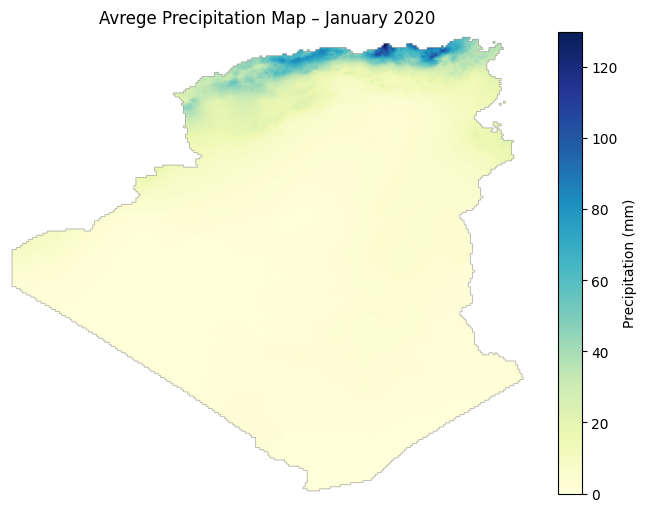

In [25]:
# === 🌧️ Exploring Precipitation (Tprec) Data ===

# 1. Collect all precipitation raster file paths (sorted by date)
tprec_paths = sorted(glob.glob("../climate_dataset/5min/prec/*.tif"))

# 2. Clip the first raster (e.g., January 2020) to Algeria–Tunisia boundary
tprec_image, tprec_transform, tprec_meta = clip_raster_with_shape(
    tprec_paths[0],
    alg_tun_gpd
)

# 3. Display raster metadata
describe_raster(tprec_image, tprec_meta, tprec_transform)

# 4. Visualize precipitation map
show_raster(
    tprec_image,
    cmap="YlGnBu",                 # blue-green scale suitable for precipitation
    title="Avrege Precipitation Map – January 2020",
    scale=None,
    colorbar_label="Precipitation (mm)"
)


## Elevation Dataset

In [ ]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
import os

# === 1. Define the file path ===
raster_file = "../elevation_dataset/be15_grd/w001001.adf"

# === 2. Open the raster ===
with rasterio.open(raster_file) as src:
    print("✅ Raster loaded successfully\n")
    print("CRS:", src.crs)
    print("Dimensions:", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Resolution (pixel size):", src.res)
    print("Bounds:", src.bounds)
    print("Data type:", src.dtypes[0])

    # === 3. Read a downsampled version to explore ===
    scale = 0.05  # 5% resolution
    new_height = int(src.height * scale)
    new_width = int(src.width * scale)
    elevation = src.read(
        1,
        out_shape=(1, new_height, new_width),
        resampling=Resampling.average
    )

    # Mask invalid values (if any)
    elevation = np.ma.masked_equal(elevation, src.nodata)

# === 4. Compute elevation statistics ===
valid_pixels = elevation.compressed()  # remove masked values

print("\n📊 Elevation Statistics:")
print("  Min:", np.min(valid_pixels))
print("  Max:", np.max(valid_pixels))
print("  Mean:", np.mean(valid_pixels))
print("  Std Dev:", np.std(valid_pixels))
print("  Number of valid pixels:", len(valid_pixels))

# === 5. Plot histogram ===
plt.figure(figsize=(8, 5))
plt.hist(valid_pixels, bins=50, color="tan", edgecolor="brown")
plt.title("Elevation Histogram (sampled at 5%)")
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# === 6. Plot the downsampled elevation map ===
plt.figure(figsize=(10, 6))
plt.imshow(elevation, cmap='terrain')
plt.colorbar(label="Elevation (m)")
plt.title("Elevation Map (Downsampled to 5%)")
plt.show()


## Land Dataset

In [ ]:

# === 1. Load shapefile ===
landcover_dz = gpd.read_file("../land_dataset/algeria/dza_gc_adg.shp")

# === 2. Basic info ===
print("✅ Landcover Algérie chargé avec succès!")
print("\n📂 Nombre de lignes :", len(landcover_dz))
print("📋 Colonnes :", list(landcover_dz.columns))
print("\n🗺️ Type de géométrie :", landcover_dz.geom_type.unique())
print("🌍 Système de coordonnées :", landcover_dz.crs)

# === 3. Aperçu des données ===
print("\n🔹 Aperçu des 5 premières lignes :")
display(landcover_dz.head())



# === 5. Vérifier les valeurs uniques d’une colonne importante (ex: 'GRIDCODE') ===
if "GRIDCODE" in landcover_dz.columns:
    print("\n🌿 Valeurs uniques de GRIDCODE :")
    print(landcover_dz["GRIDCODE"].unique())

# === 6. Visualiser rapidement ===
landcover_dz.plot(column="GRIDCODE" if "GRIDCODE" in landcover_dz.columns else None,
                  legend=True,
                  figsize=(8, 6))


## Fire Dataset

### Algeria

In [ ]:

# === 1. Load fire dataset ===
fire_dz = pd.read_csv("../fire_dataset/viirs-jpss1_2024_Algeria.csv")
print("✅ Fire data loaded:", len(fire_dz), "rows")
display(fire_dz.head())

# === 2. Convert to GeoDataFrame ===
geometry = [Point(xy) for xy in zip(fire_dz["longitude"], fire_dz["latitude"])]
fire_gdf = gpd.GeoDataFrame(fire_dz, geometry=geometry, crs="EPSG:4326")  # WGS84

# === 3. Load Algeria shapefile for context ===
algeria = gpd.read_file("../shapefiles/algeria/gadm41_DZA_0.shp")

# === 4. Plot fire points over Algeria ===
fig, ax = plt.subplots(figsize=(8, 8))
algeria.plot(ax=ax, color="lightgrey", edgecolor="black")
fire_gdf.plot(
    ax=ax,
    markersize=10,
    c="red",
    alpha=0.6,
    label="Fire detections"
)
plt.title("🔥 Fire Detections in Algeria (VIIRS - 2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

### Tunisia

In [ ]:


# === 1. Load fire dataset ===
fire_tn = pd.read_csv("../fire_dataset/viirs-jpss1_2024_Tunisia.csv")
print("✅ Fire data loaded:", len(fire_tn), "rows")
display(fire_tn.head())

# === 2. Convert to GeoDataFrame ===
geometry = [Point(xy) for xy in zip(fire_tn["longitude"], fire_tn["latitude"])]
fire_tn_gdf = gpd.GeoDataFrame(fire_tn, geometry=geometry, crs="EPSG:4326")  # WGS84

# === 3. Load Tunisia shapefile ===
tunisia = gpd.read_file("../shapefiles/tunisia/gadm41_TUN_0.shp")

# === 4. Plot fire points over Tunisia ===
fig, ax = plt.subplots(figsize=(8, 8))
tunisia.plot(ax=ax, color="beige", edgecolor="black")
fire_tn_gdf.plot(
    ax=ax,
    markersize=10,
    c="red",
    alpha=0.6,
    label="Fire detections"
)
plt.title("🔥 Fire Detections in Tunisia (VIIRS - 2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


# Soil Dataset

In [ ]:

# === Paths ===
base_dir = r"../soil_dataset"
raster_path = os.path.join(base_dir, "HWSD2_RASTER", "HWSD2.bil")
shapefile_path = os.path.join(base_dir, "country.shp")

# === Load shapefile ===
country = gpd.read_file(shapefile_path)

# === Open raster and read data (downsampled to save memory) ===
with rasterio.open(raster_path) as src:
    soil_data = src.read(1, out_shape=(
        int(src.height // 10),
        int(src.width // 10)
    ))
    transform = src.transform * src.transform.scale(
        (src.width / soil_data.shape[-1]),
        (src.height / soil_data.shape[-2])
    )
    nodata_value = src.nodata

# === Mask NoData values ===
if nodata_value is None:
    nodata_value = 0
soil_data = np.where(soil_data == nodata_value, np.nan, soil_data)

# === Plot map ===
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(
    soil_data,
    extent=[
        transform.c,
        transform.c + transform.a * soil_data.shape[1],
        transform.f + transform.e * soil_data.shape[0],
        transform.f
    ],cmap='terrain'
)
country.boundary.plot(ax=ax, color='black', linewidth=1)
plt.colorbar(ax.images[0], ax=ax, label='Soil Classes / Values')
plt.title("HWSD2 Soil Map", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

## ShapeFiles

### Algeria

In [ ]:
algeria_poly = gpd.read_file("../shapefiles/algeria/gadm41_DZA_0.shp")
algeria_poly.plot(edgecolor='red', facecolor='none')
plt.title("Frontière Algérie")
plt.show()


### Tunisia

In [ ]:
algeria_poly = gpd.read_file("../shapefiles/algeria/gadm41_DZA_0.shp")

tunisia_poly = gpd.read_file("../shapefiles/tunisia/gadm41_TUN_0.shp")
tunisia_poly.plot(edgecolor='red', facecolor='none')
plt.title("Frontière Tunisie")
plt.show()


In [ ]:
# Concatenate for plotting
alg_tun_shp = pd.concat([algeria_poly, tunisia_poly], ignore_index=True)


# === 2. Plot with border between countries ===
fig, ax = plt.subplots(figsize=(6, 6))
alg_tun_shp.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.2)
plt.title("Algeria–Tunisia Border", fontsize=12)
plt.axis("off")
plt.show()

## Worldwide Clip 

In [ ]:
# === 3. Create a single merged geometry for clipping ===
# (so that the raster clips to the combined shape)
merged_shape = gpd.GeoDataFrame(geometry=[unary_union(alg_tun_shp.geometry)],
                                crs=alg_tun_shp.crs)

# === 4. Clip raster to combined shape ===
clip_raster_to_shape(
    "../climate_dataset/5min/max/wc2.1_cruts4.09_5m_tmax_2020-01.tif",
    merged_shape
)

In [ ]:
# Algérie
clip_raster_to_shape("../elevation_dataset/be15_grd/w001001.adf",
                     merged_shape)




In [ ]:
# Algérie
clip_raster_to_shape("../soil_dataset/HWSD2_RASTER/HWSD2.bil",
                     merged_shape)

